# Suicide report

This report contains the analysis of suicides recorded from 1985 to 2016. The source of this data is from [Kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016 "Suicide Rates Overview 1985 to 2016"). 

The report was created with the intention of observing and analysing suicides and to look for emerging patterns in the data.

## Features

While there are many features/attributes these records hold, the analysis does not involve all of them. All features will be listed below according to whether they were used or not. As to why some feature weren't used, an explanation can be read for each of them.

### Selected features
- country
- year
- sex
- age
- generation
- suicides_no
- population
- suicides/100k pop

### Features left out

- country-year: basic multi grouping
- HDI for year: mostly missing data
- gdp_for_year: data granularity isn't available on record level but only on country and year level
- gdp_per_capita: data granularity isn't available on record level but only on country and year level

## Packages used

In [1]:
using CSV
using DataFrames
using StatsPlots
using Statistics

## Shape of data

In [2]:
df = CSV.read("suicide.csv", DataFrame)
select!(df, Not([:"country-year", :"HDI for year", :" gdp_for_year (\$) ", :"gdp_per_capita (\$)"]))
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,country,,Albania,,Uzbekistan,0,String31
2,year,2001.26,1985,2002.0,2016,0,Int64
3,sex,,female,,male,0,String7
4,age,,15-24 years,,75+ years,0,String15
5,suicides_no,242.574,0,25.0,22338,0,Int64
6,population,1.84479e6,278,430150.0,43805214,0,Int64
7,suicides/100k pop,12.8161,0.0,5.99,224.97,0,Float64
8,generation,,Boomers,,Silent,0,String15


## Potential impact factors
### Gender

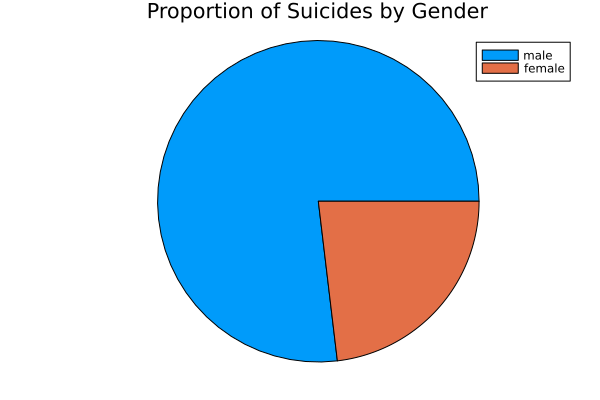

In [10]:
suicides_by_gender = combine(groupby(df, :sex), :suicides_no => sum => :total_suicides)
pie(suicides_by_gender.sex, suicides_by_gender.total_suicides, title="Proportion of Suicides by Gender")

### Country

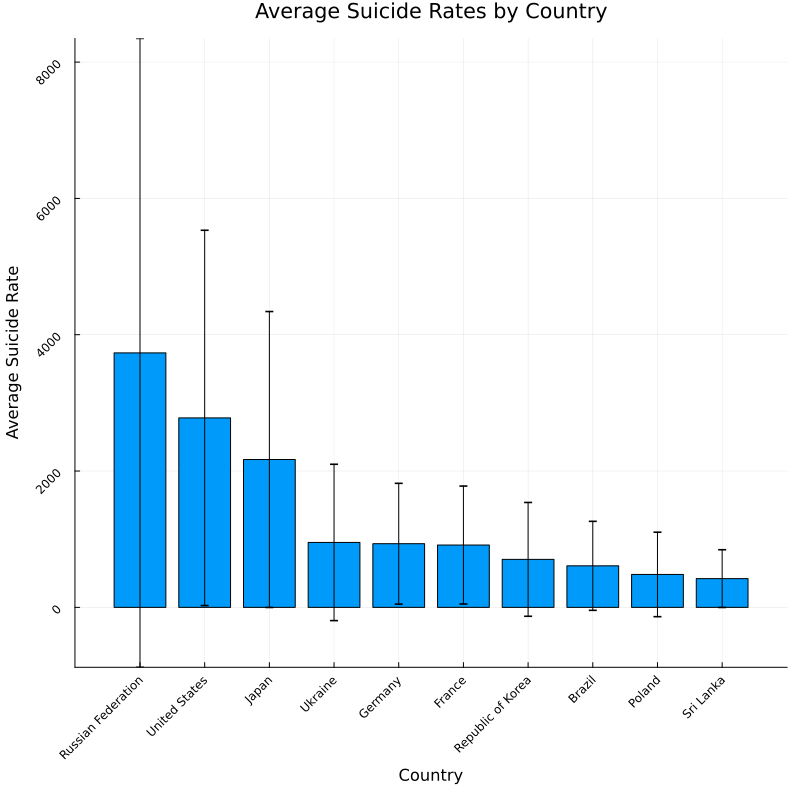

In [3]:
suicide_avg_by_country = combine(
    groupby(df, :country),
    :suicides_no => mean => :suicide_rate_avg,
    :suicides_no => std => :suicide_rate_std
)
sorted_by_suicide_avg = sort(suicide_avg_by_country, :suicide_rate_avg, rev=true)
top10_by_suicide_avg = sorted_by_suicide_avg[1:10, :]

bar(
    top10_by_suicide_avg.country,
    top10_by_suicide_avg.suicide_rate_avg,
    yerr = top10_by_suicide_avg.suicide_rate_std,
    title="Average Suicide Rates by Country",
    xlabel="Country",
    ylabel="Average Suicide Rate",
    legend=false,
    rotation=45,
    size=(800, 800),
)

### Generation

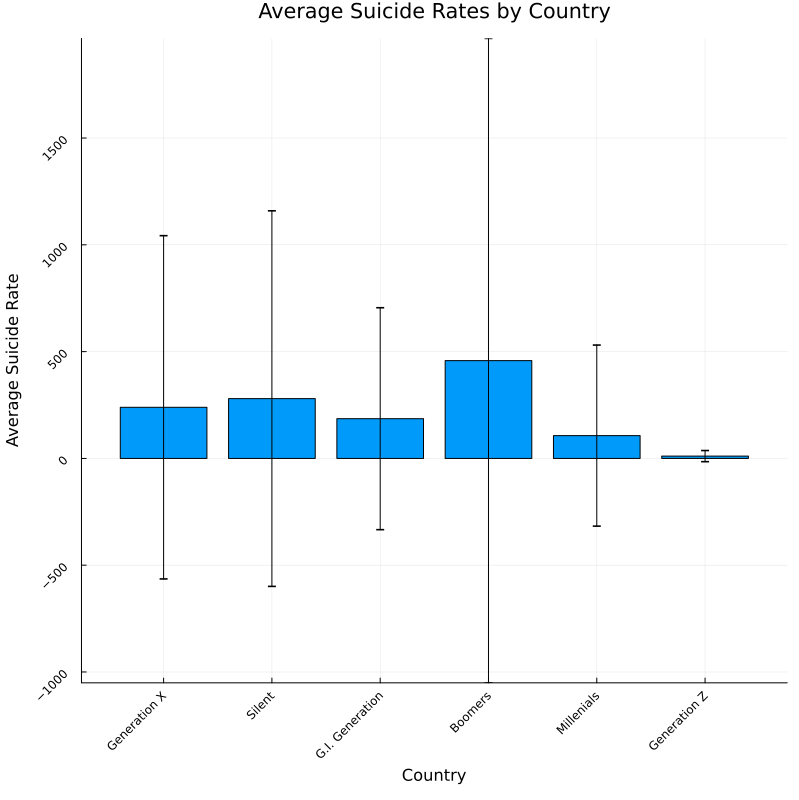

In [4]:
suicide_avg_by_generation = combine(
    groupby(df, :generation),
    :suicides_no => mean => :suicide_rate_avg,
    :suicides_no => std => :suicide_rate_std
)

bar(
    suicide_avg_by_generation.generation,
    suicide_avg_by_generation.suicide_rate_avg,
    yerr = suicide_avg_by_generation.suicide_rate_std,
    title="Average Suicide Rates by Generation",
    xlabel="Generation",
    ylabel="Average Suicide Rate",
    legend=false,
    rotation=45,
    size=(800, 800),
)

### Year

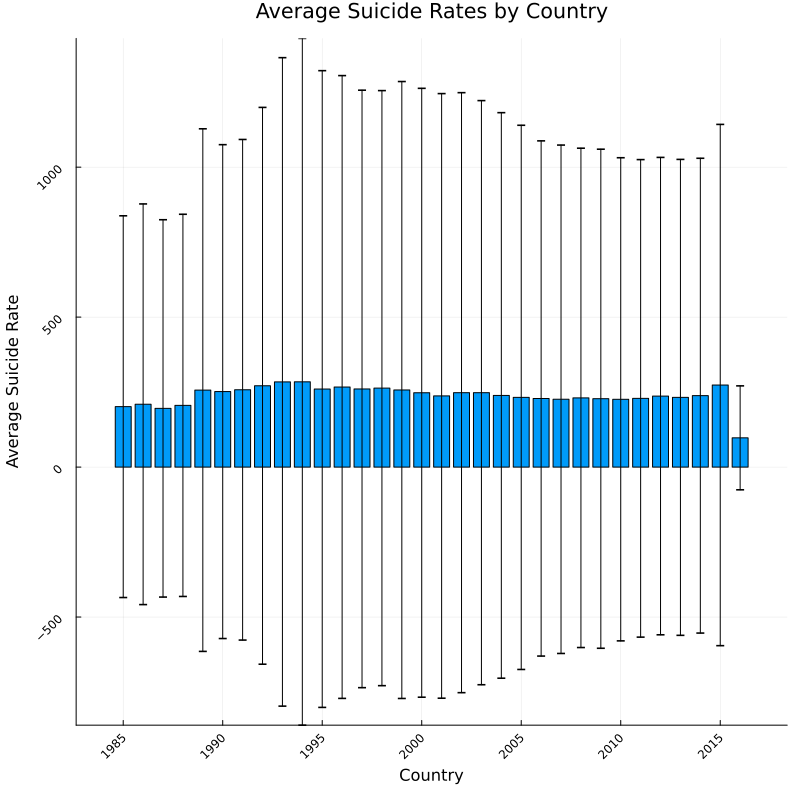

In [5]:
suicide_avg_by_year = combine(
    groupby(df, :year),
    :suicides_no => mean => :suicide_rate_avg,
    :suicides_no => std => :suicide_rate_std
)

bar(
    suicide_avg_by_year.year,
    suicide_avg_by_year.suicide_rate_avg,
    yerr = suicide_avg_by_year.suicide_rate_std,
    title="Average Suicide Rates by Year",
    xlabel="Year",
    ylabel="Average Suicide Rate",
    legend=false,
    rotation=45,
    size=(800, 800),
)

### Age group

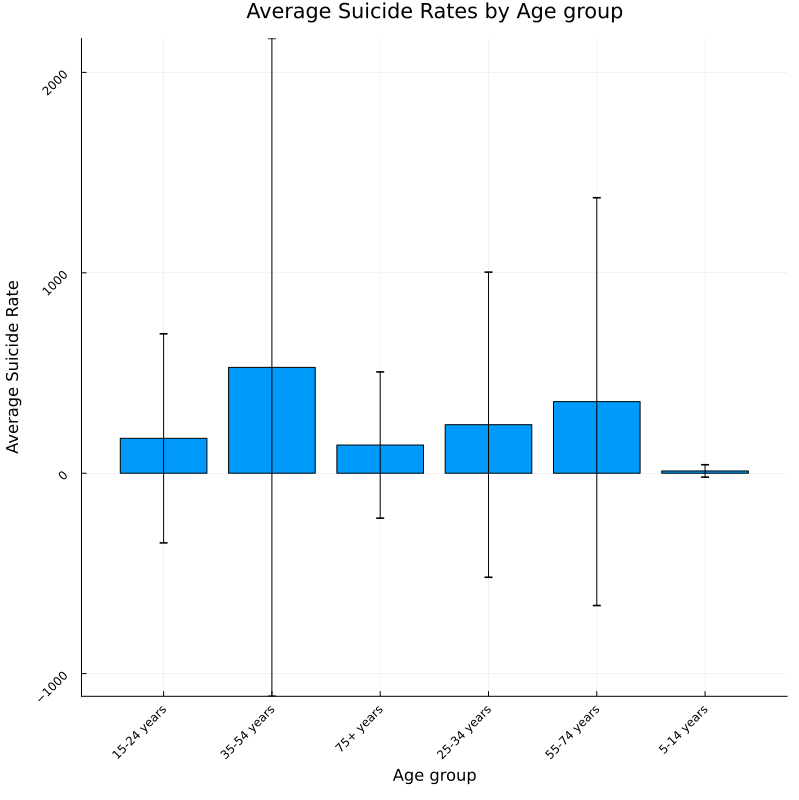

In [6]:
suicide_avg_by_age = combine(
    groupby(df, :age),
    :suicides_no => mean => :suicide_rate_avg,
    :suicides_no => std => :suicide_rate_std
)

bar(
    suicide_avg_by_age.age,
    suicide_avg_by_age.suicide_rate_avg,
    yerr = suicide_avg_by_age.suicide_rate_std,
    title="Average Suicide Rates by Age group",
    xlabel="Age group",
    ylabel="Average Suicide Rate",
    legend=false,
    rotation=45,
    size=(800, 800),
)

## Key takeaways from basic grouping and visuals

1. Men are more likely to become victims of suicide - potential feature for hypothesis
2. For most of the features, simply selecting and grouping by only one of them is error prone, hence the great outliers with standard deviation.